In [1]:
# Import SparkSession
sc.install_pypi_package("matplotlib")
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, DoubleType, IntegerType, StructType, StructField
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt
import numpy as np

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
23,application_1589736101732_0024,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl

In [2]:
# Create SparkSession object

spark = SparkSession.builder.appName('data_processing').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# Load global csv datasets 

confirmed_global = spark.read.csv('s3://covidcs/datasets/global/time_series_covid19_confirmed_global.csv', inferSchema=True, header=True)
deaths_global = spark.read.csv('s3://covidcs/datasets/global/time_series_covid19_deaths_global.csv', inferSchema=True, header=True)
recovered_global = spark.read.csv('s3://covidcs/datasets/global/time_series_covid19_recovered_global.csv', inferSchema=True, header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# Columns of dataframes

confirmed_global.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [5]:
deaths_global.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [6]:
recovered_global.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [7]:
# Total confirmed by Country/Region

confirmed_by_country = confirmed_global.groupBy('Country/Region').agg(sum('5/8/20').alias('total')).orderBy('total', ascending=False)
confirmed_by_country.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-------+
|Country/Region|  total|
+--------------+-------+
|            US|1283929|
|         Spain| 222857|
|         Italy| 217185|
|United Kingdom| 212629|
|        Russia| 187859|
|        France| 176202|
|       Germany| 170588|
|        Brazil| 146894|
|        Turkey| 135569|
|          Iran| 104691|
|         China|  83976|
|        Canada|  67674|
|          Peru|  61847|
|         India|  59695|
|       Belgium|  52011|
|   Netherlands|  42292|
|  Saudi Arabia|  35432|
|        Mexico|  31522|
|   Switzerland|  30207|
|       Ecuador|  28818|
+--------------+-------+
only showing top 20 rows

In [8]:
# Total deaths by Country/Region

deaths_by_country = deaths_global.groupBy('Country/Region').agg(sum('5/8/20').alias('total')).orderBy('total', ascending=False)
deaths_by_country.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-----+
|Country/Region|total|
+--------------+-----+
|            US|77180|
|United Kingdom|31316|
|         Italy|30201|
|         Spain|26299|
|        France|26233|
|        Brazil|10017|
|       Belgium| 8521|
|       Germany| 7510|
|          Iran| 6541|
|   Netherlands| 5377|
|        Canada| 4697|
|         China| 4637|
|        Turkey| 3689|
|        Sweden| 3175|
|        Mexico| 3160|
|         India| 1985|
|   Switzerland| 1823|
|        Russia| 1723|
|          Peru| 1714|
|       Ecuador| 1704|
+--------------+-----+
only showing top 20 rows

In [9]:
# Total recovered by Country/Region

recovered_by_country = recovered_global.groupBy('Country/Region').agg(sum('5/8/20').alias('total')).orderBy('total', ascending=False)
recovered_by_country.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+------+
|Country/Region| total|
+--------------+------+
|            US|198993|
|       Germany|141700|
|         Spain|131148|
|         Italy| 99023|
|        Turkey| 86396|
|          Iran| 83837|
|         China| 78993|
|        Brazil| 59297|
|        France| 55892|
|        Canada| 30239|
|        Russia| 26608|
|   Switzerland| 26100|
|        Mexico| 20314|
|          Peru| 19012|
|         India| 17887|
|       Ireland| 17110|
|       Austria| 13836|
|       Belgium| 13201|
|         Chile| 12160|
|        Israel| 11229|
+--------------+------+
only showing top 20 rows

In [10]:
# Date of highest deaths by country

dg = deaths_global.groupBy('Country/Region').sum().collect()
highest_deaths = []
for country in dg:
    date_index = 3
    mayor = country[3]
     
    for i in range(3, len(country[3:-1])):
        if country[i + 1] - country[i] > mayor:
            date_index = i + 1
            mayor = country[i + 1] - country[i]
    
    highest_deaths.append([country[0], deaths_global.columns[date_index + 1], mayor])
    
schema_highest_deaths = StructType([
    StructField('Country/Region', StringType(), True),
    StructField('Date', StringType(), True),
    StructField('Highest', IntegerType(), True),
])


highest_deaths = spark.createDataFrame(highest_deaths, schema_highest_deaths)
highest_deaths.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-------+-------+
|Country/Region|   Date|Highest|
+--------------+-------+-------+
|        Guyana| 4/2/20|      2|
|        Turkey|4/19/20|    127|
|     Argentina| 5/4/20|     14|
|        Angola|3/29/20|      2|
|       Albania|3/31/20|      4|
|     Nicaragua| 5/3/20|      2|
|          Peru|4/30/20|    108|
|         China|4/17/20|   1290|
|       Somalia|4/23/20|      8|
|       Croatia|4/19/20|      8|
|       Andorra|3/31/20|      4|
|      Suriname| 4/3/20|      1|
|        Norway|4/20/20|     16|
|         Niger|4/17/20|      4|
|       Ireland|4/24/20|    220|
| Liechtenstein| 4/4/20|      1|
|        Bhutan|1/22/20|      0|
|        Israel| 4/9/20|     13|
|      Holy See|1/22/20|      0|
|        Mexico| 5/5/20|    236|
+--------------+-------+-------+
only showing top 20 rows

In [11]:
# Active cases by country

tcg = confirmed_global.groupBy('Country/Region').agg(sum('5/8/20').alias('total')).collect()
tdg = deaths_global.groupBy('Country/Region').agg(sum('5/8/20').alias('total')).collect()
trg = recovered_global.groupBy('Country/Region').agg(sum('5/8/20').alias('total')).collect()
active_cases = []
for i in range(len(tcg)):
    if tcg[i][0] == tdg[i][0] and trg[i][0] == tdg[i][0]:
        total = tcg[i][-1] - tdg[i][-1] - trg[i][-1]
        active_cases.append([tcg[i][0], total])
    else:
        trg[i], trg[i+1] = trg[i+1], trg[i]
        total = tcg[i][-1] - tdg[i][-1] - trg[i][-1]
        active_cases.append([tcg[i][0], total])
        
schema = StructType([
    StructField('Country/Region', StringType(), True),
    StructField('Active Cases', IntegerType(), True),
])


active_cases = spark.createDataFrame(active_cases, schema)
active_cases_order_desc = active_cases.orderBy('Active Cases', ascending=False)
active_cases_order_desc.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+------------+
|Country/Region|Active Cases|
+--------------+------------+
|            US|     1007756|
|United Kingdom|      180316|
|        Russia|      159528|
|        France|       94077|
|         Italy|       87961|
|        Brazil|       77580|
|         Spain|       65410|
|        Turkey|       45484|
|          Peru|       41121|
|         India|       39823|
|   Netherlands|       36768|
|        Canada|       32738|
|       Belgium|       30289|
|  Saudi Arabia|       26083|
|      Portugal|       23732|
|       Ecuador|       23681|
|       Germany|       21378|
|     Singapore|       19647|
|      Pakistan|       18306|
|         Qatar|       17819|
+--------------+------------+
only showing top 20 rows

In [12]:
# Load Colombia csv datasets

colombia_data = spark.read.csv('s3://covidcs/datasets/colombia/Covid-19 Colombia.csv', inferSchema=True, header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# Columns of dataframe

colombia_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA', 'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web']

In [14]:
# Total Colombia's deaths 

deaths_colombia = colombia_data.filter(colombia_data['estado'] == 'Fallecido').select('estado', 'sexo','edad')
deaths_colombia.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

428

In [15]:
# Total Male Colombia's deaths 

deaths_m = deaths_colombia.filter(deaths_colombia['sexo' ]== 'M').count()
deaths_m

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

242

In [16]:
# Total Female Colombia's deaths 

deaths_f = deaths_colombia.filter(deaths_colombia['sexo' ]== 'F').count()
deaths_f

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

186

In [17]:
# Total Colombia's cases by department

cases_colombia_by_departament = colombia_data.groupBy('Departamento o Distrito ').count()
cases_colombia_by_departament.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|         Valle del Cauca| 1211|
|    Archipiélago de S...|    6|
|             Bogotá D.C.| 3824|
|                   Cesar|   70|
|                   Chocó|   27|
|                  Boyacá|   61|
|      Norte de Santander|   91|
|     Cartagena D.T. y C.|  496|
|                   Sucre|    2|
|                   Cauca|   42|
|    Santa Marta D.T. ...|  190|
|                 Caquetá|   15|
|                  Caldas|   94|
|       Buenaventura D.E.|   52|
|               Atlántico|  464|
|                Casanare|   20|
|                 Bolívar|   40|
|               Magdalena|   73|
|               Risaralda|  214|
|                  Tolima|  103|
+------------------------+-----+
only showing top 20 rows

In [18]:
# Total Colombia's cases by department order decs

cases_colombia_by_departament_order_descs = cases_colombia_by_departament.orderBy('count', ascending=False)
cases_colombia_by_departament_order_descs.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|             Bogotá D.C.| 3824|
|         Valle del Cauca| 1211|
|                    Meta|  835|
|     Cartagena D.T. y C.|  496|
|               Atlántico|  464|
|               Antioquia|  464|
|                Amazonas|  430|
|       Barranquilla D.E.|  404|
|            Cundinamarca|  270|
|                  Nariño|  253|
|               Risaralda|  214|
|    Santa Marta D.T. ...|  190|
|                   Huila|  147|
|                  Tolima|  103|
|                  Caldas|   94|
|      Norte de Santander|   91|
|               Magdalena|   73|
|                   Cesar|   70|
|                 Quindio|   66|
|                  Boyacá|   61|
+------------------------+-----+
only showing top 20 rows

In [19]:
#Country confirmed plot

countries = [country['Country/Region'] for country in confirmed_by_country.select('Country/Region').collect()]
confirmed = [country['total'] for country in confirmed_by_country.select('total').collect()]

plt.switch_backend("agg")
fig, axs = plt.subplots(figsize=(20, 5))
axs.bar(countries[:20], confirmed[:20])
fig.suptitle('Country confirmed')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0.98, 'Country confirmed')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

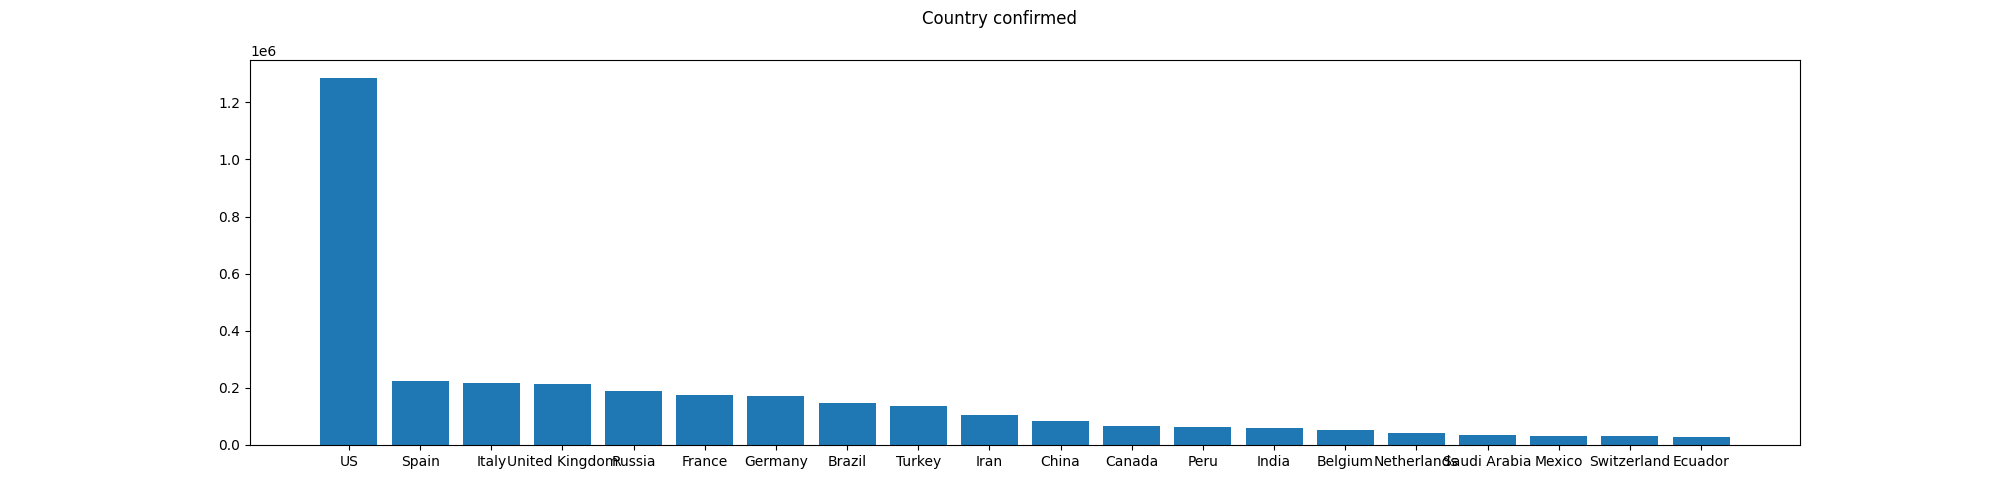

In [20]:
%matplot plt

In [21]:
#Country deaths plot

countries = [country['Country/Region'] for country in deaths_by_country.select('Country/Region').collect()]
deaths = [country['total'] for country in deaths_by_country.select('total').collect()]

fig, axs = plt.subplots(figsize=(20, 5))
axs.bar(countries[:20], deaths[:20])
fig.suptitle('Country deaths')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0.98, 'Country deaths')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

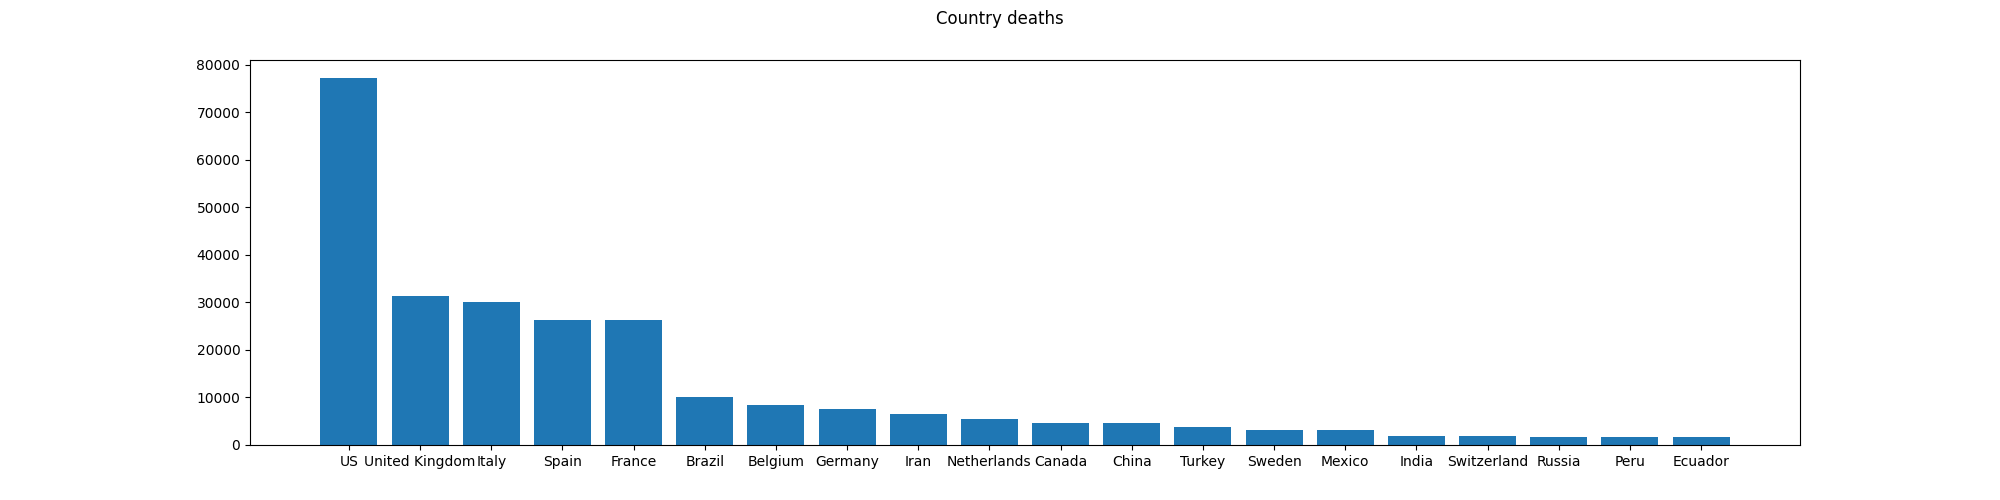

In [22]:
%matplot plt

In [23]:
# Country recovered plot

countries = [country['Country/Region'] for country in recovered_by_country.select('Country/Region').collect()]
recovered = [country['total'] for country in recovered_by_country.select('total').collect()]

fig, axs = plt.subplots(figsize=(20, 5))
axs.bar(countries[:20], recovered[:20])
fig.suptitle('Country recovered')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0.98, 'Country recovered')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

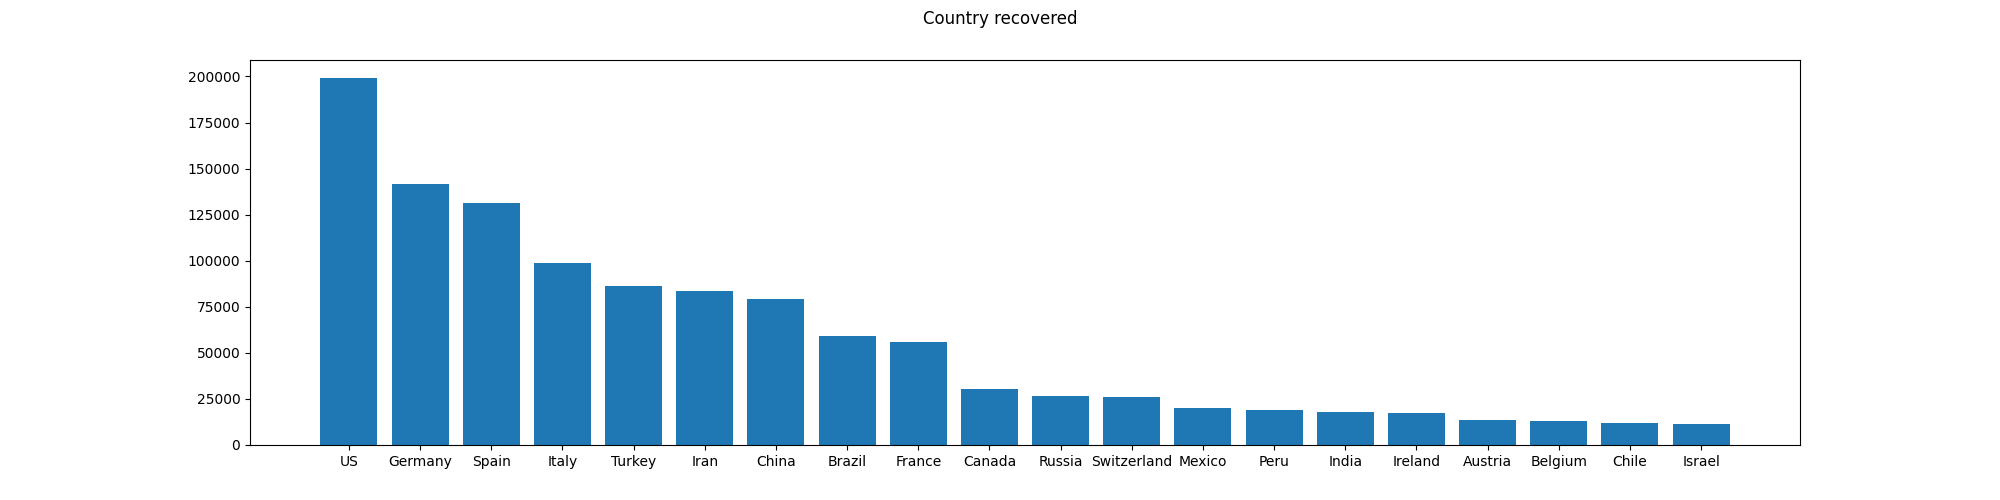

In [24]:
%matplot plt

In [25]:
# Active cases by country

countries = [country['Country/Region'] for country in active_cases_order_desc.select('Country/Region').collect()]
recovered = [country['Active Cases'] for country in active_cases_order_desc.select('Active Cases').collect()]

fig, axs = plt.subplots(figsize=(20, 5))
axs.bar(countries[:20], recovered[:20])
fig.suptitle('Active cases by country')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0.98, 'Active cases by country')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

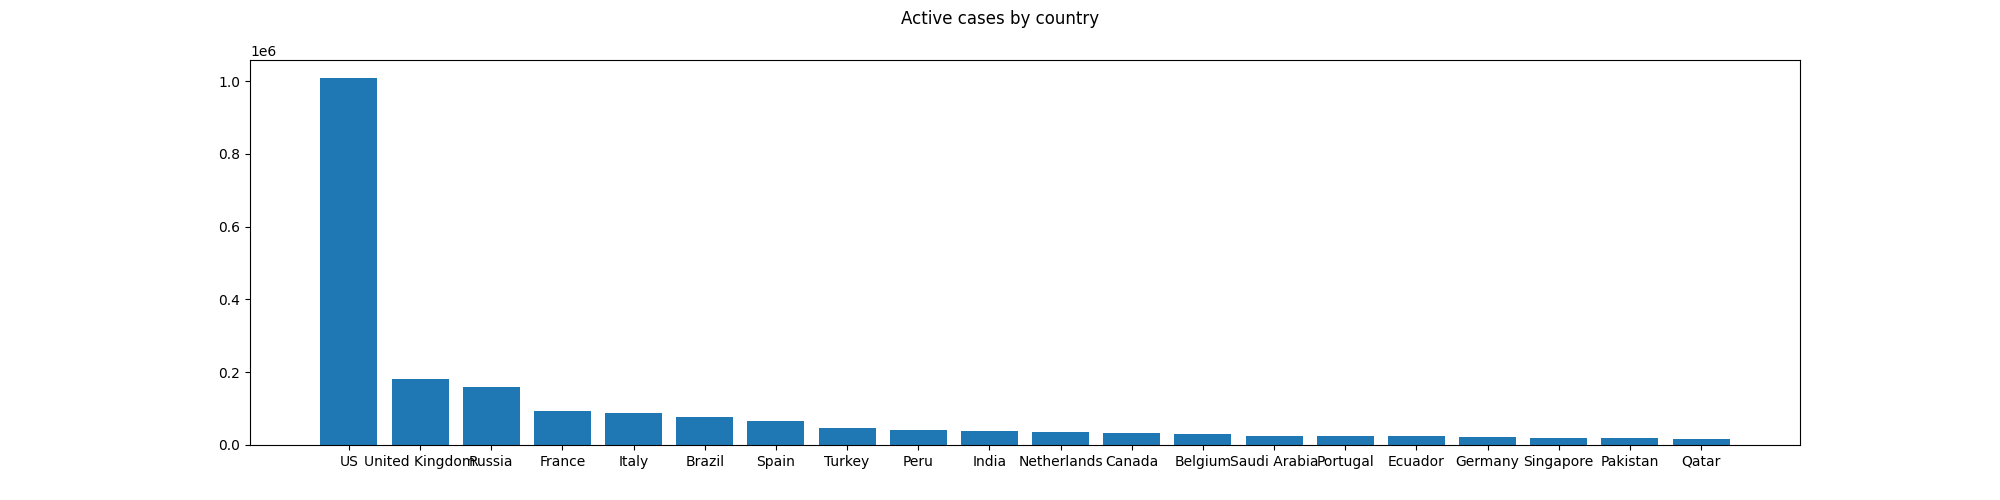

In [26]:
%matplot plt

In [27]:
# Deaths by gender in Colombia

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

data = []
data.append(deaths_m)
data.append(deaths_f)
ingredients = ['Male', 'Female']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Deaths by gender in Colombia")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Deaths by gender in Colombia')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

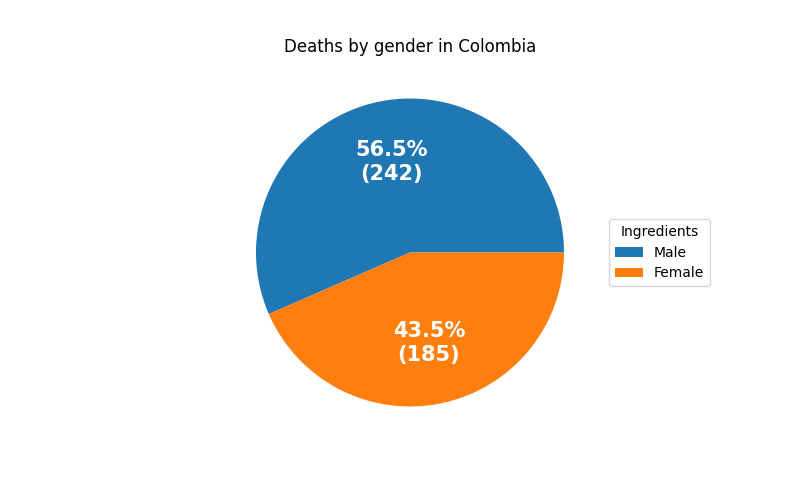

In [28]:
%matplot plt

In [29]:
# Cases Colombia by departament plot

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="auto"))

states_count = [state['count'] for state in cases_colombia_by_departament_order_descs.select('count').collect()]

otros_count = 0
for i in states_count[11:-1]:
    otros_count = otros_count + i

data = []
for i in states_count[:11]:
    data.append(i)
    
data.append(otros_count)

states = [state['Departamento o Distrito '] for state in cases_colombia_by_departament_order_descs.select('Departamento o Distrito ').collect()]

ingredients = []

for i in states[:11]:
    ingredients.append(i)
    
ingredients.append('Otros')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=5, weight="bold")

ax.set_title("Cases Colombia by departament")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Cases Colombia by departament')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

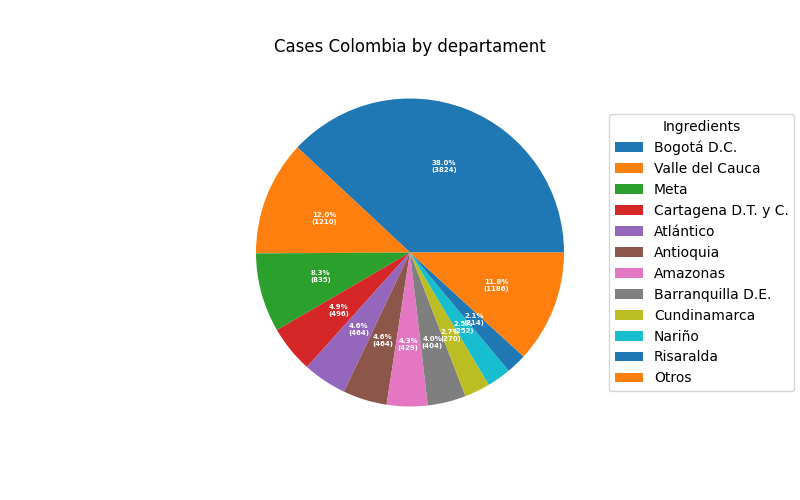

In [30]:
%matplot plt

In [31]:
# Cases of deaths in Colombia by age

age_deaths = deaths_colombia.groupBy('edad').count().orderBy('edad', ascending=True)

age = [country['edad'] for country in age_deaths.select('edad').collect()]
deaths = [country['count'] for country in age_deaths.select('count').collect()]

fig, axs = plt.subplots(figsize=(20, 5))
axs.bar(age, deaths)
fig.suptitle('Deaths cases by age')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0.98, 'Deaths cases by age')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

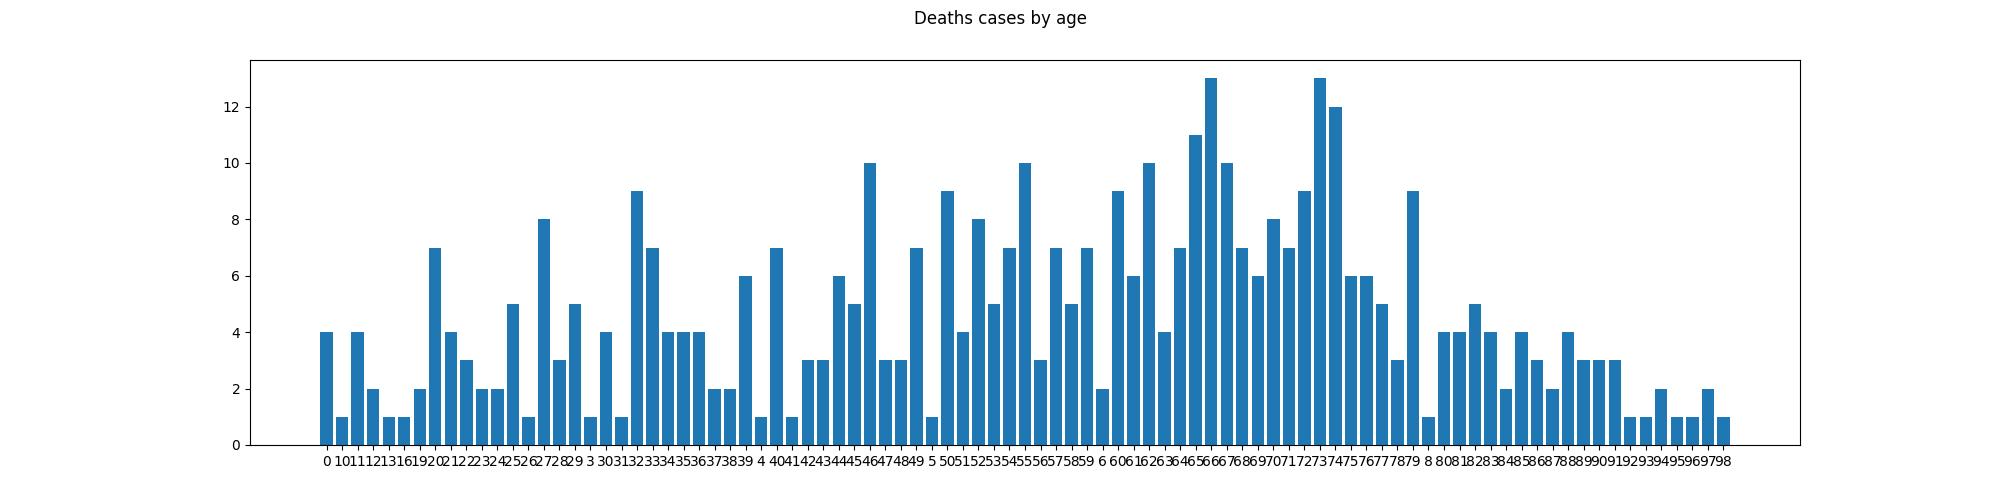

In [32]:
%matplot plt

In [33]:
# Colombia vs Global (confirmed)
# By day we refer to the number of days corresponding to the dataset

date_confirmed_global = confirmed_global.collect()

confirmed_global_plot = []
confirmed_colombia_plot = []

for i in range(4, len(date_confirmed_global[0])):
    cases_col = 0
    cases_glo = 0
    for j in range(0, len(date_confirmed_global)):
        if date_confirmed_global[j][1] == 'Colombia':
            cases_col = cases_col + date_confirmed_global[j][i]
        else:
            cases_glo = cases_glo + date_confirmed_global[j][i]
    confirmed_global_plot.append(cases_glo)
    confirmed_colombia_plot.append(cases_col)
       
        
x1 = list(range(1, len(date_confirmed_global[0]) - 3))

y1 = confirmed_global_plot
y2 = confirmed_colombia_plot

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(x1, y1, '.-')
plt.title('Colombia vs Global (confirmed)')
plt.ylabel('Global')

plt.subplot(2, 1, 2)
plt.plot(x1, y2, '.-')
plt.xlabel('Day')
plt.ylabel('Colombia')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Colombia')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

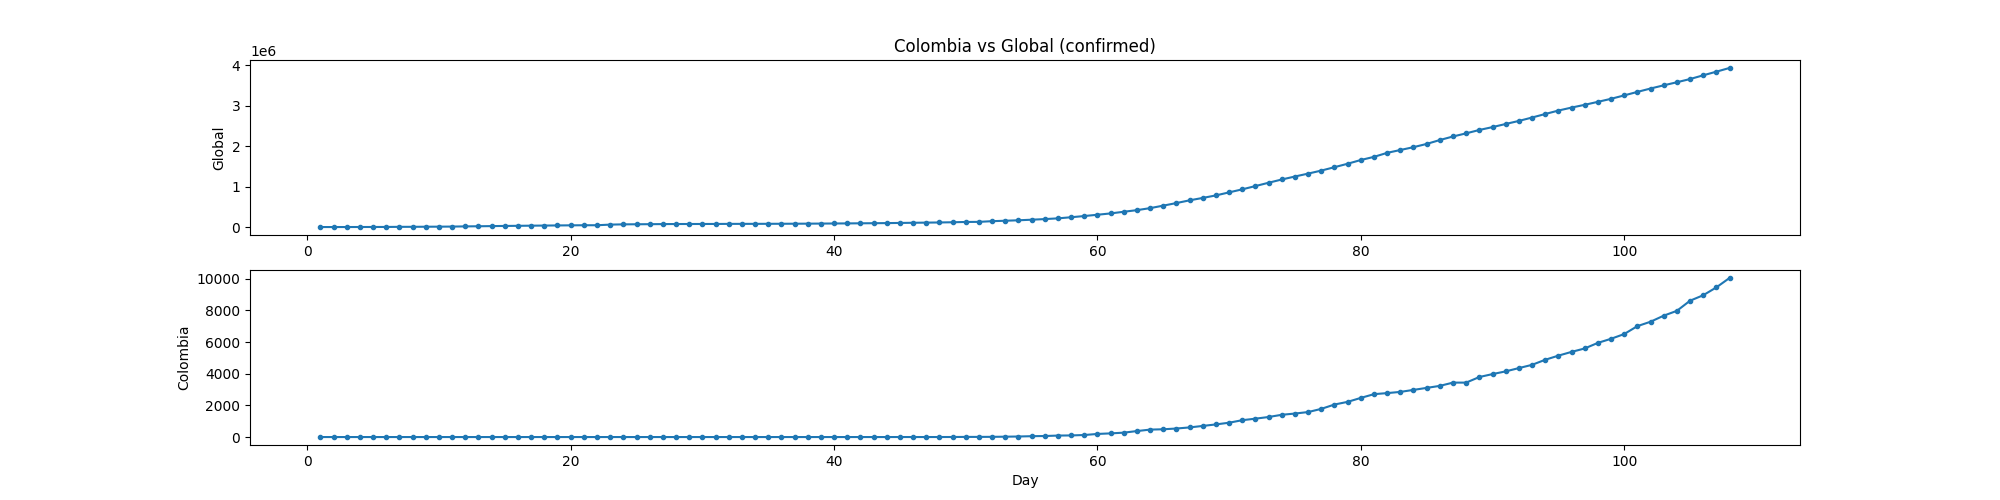

In [34]:
%matplot plt

In [35]:
# Colombia vs Global (deaths)
# By day we refer to the number of days corresponding to the dataset

date_deaths_global = deaths_global.collect()

deaths_global_plot = []
deaths_colombia_plot = []

for i in range(4, len(date_deaths_global[0])):
    cases_col = 0
    cases_glo = 0
    for j in range(0, len(date_deaths_global)):
        if date_deaths_global[j][1] == 'Colombia':
            cases_col = cases_col + date_deaths_global[j][i]
        else:
            cases_glo = cases_glo + date_deaths_global[j][i]
    deaths_global_plot.append(cases_glo)
    deaths_colombia_plot.append(cases_col)
       
        
x1 = list(range(1, len(date_deaths_global[0]) - 3))

y1 = deaths_global_plot
y2 = deaths_colombia_plot

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(x1, y1, '.-')
plt.title('Colombia vs Global (deaths)')
plt.ylabel('Global')

plt.subplot(2, 1, 2)
plt.plot(x1, y2, '.-')
plt.xlabel('Day')
plt.ylabel('Colombia')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Colombia')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

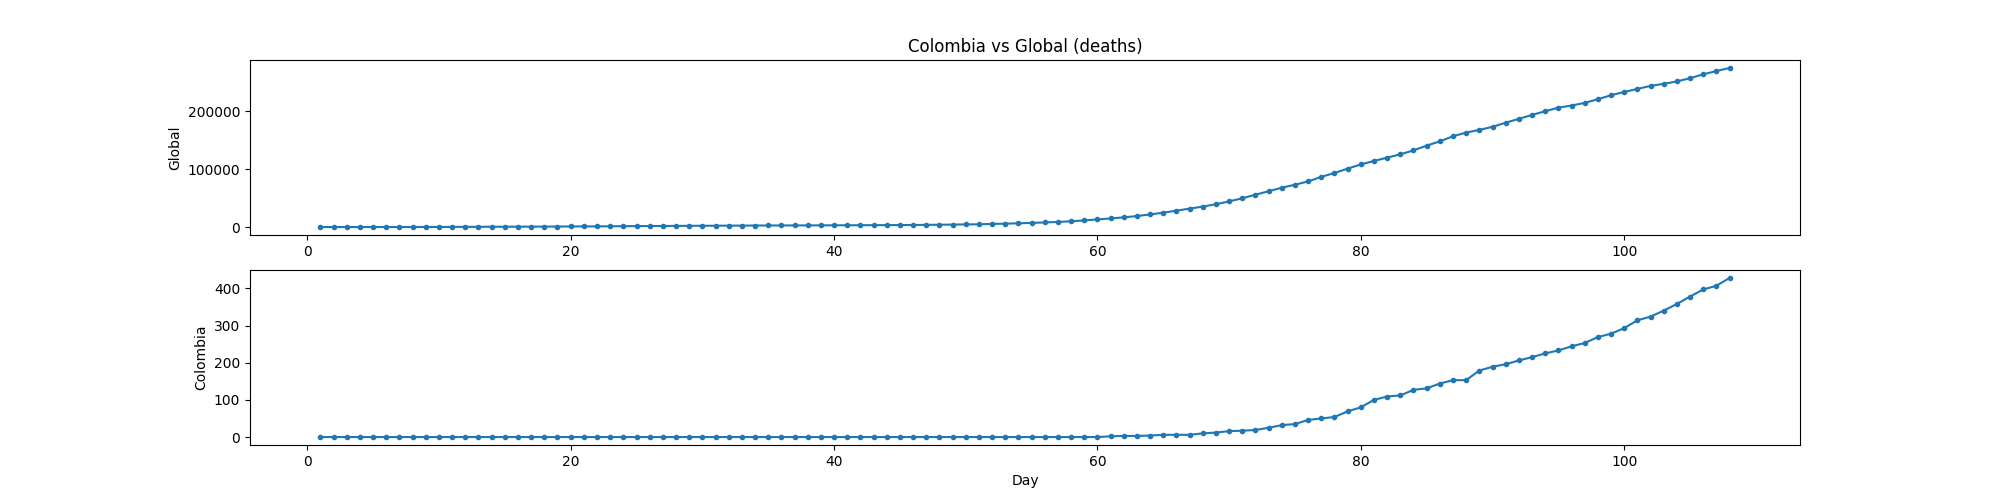

In [36]:
%matplot plt

In [37]:
# Colombia vs Global (recovered)
# By day we refer to the number of days corresponding to the dataset

date_recovered_global = recovered_global.collect()

recovered_global_plot = []
recovered_colombia_plot = []

for i in range(4, len(date_recovered_global[0])):
    cases_col = 0
    cases_glo = 0
    for j in range(0, len(date_recovered_global)):
        if date_recovered_global[j][1] == 'Colombia':
            cases_col = cases_col + date_recovered_global[j][i]
        else:
            cases_glo = cases_glo + date_recovered_global[j][i]
    recovered_global_plot.append(cases_glo)
    recovered_colombia_plot.append(cases_col)
       
        
x1 = list(range(1, len(date_recovered_global[0]) - 3))

y1 = recovered_global_plot
y2 = recovered_colombia_plot

plt.clf()

plt.subplot(2, 1, 1)
plt.plot(x1, y1, '.-')
plt.title('Colombia vs Global (recovered)')
plt.ylabel('Global')

plt.subplot(2, 1, 2)
plt.plot(x1, y2, '.-')
plt.xlabel('Day')
plt.ylabel('Colombia')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Colombia')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

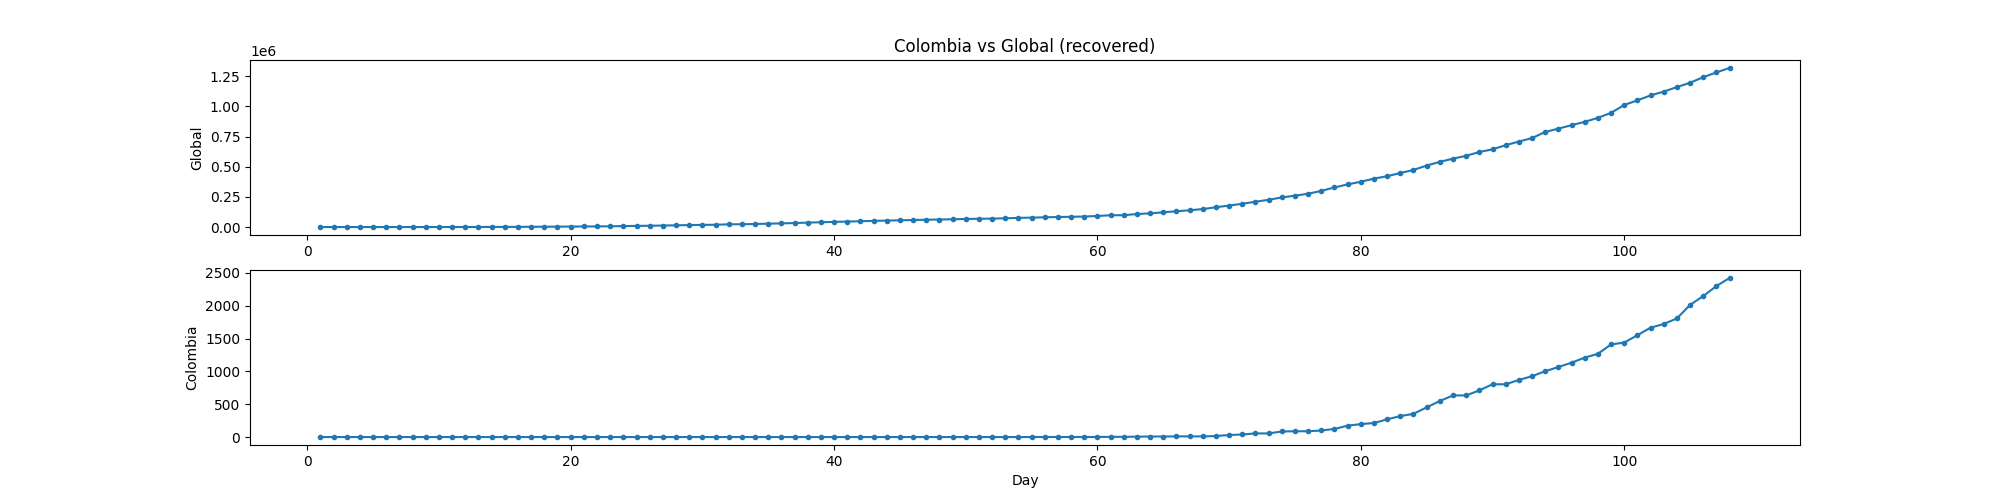

In [38]:
%matplot plt